# Graph

## 7.2 Vocabulary and Definitions

### Vertex
A vertex (also called a “node”) is a fundamental part of a graph. It can have a name, which we will call the “key.” A vertex may also have additional information. We will call this additional information the “payload.”

### Edge
An edge (also called an “arc”) is another fundamental part of a graph. An edge connects two vertices to show that there is a relationship between them. Edges may be one-way or two-way. If the edges in a graph are all one-way, we say that the graph is a directed graph, or a digraph. The class prerequisites graph shown above is clearly a digraph since you must take some classes before others.

### Weight
Edges may be weighted to show that there is a cost to go from one vertex to another. For example in a graph of roads that connect one city to another, the weight on the edge might represent the distance between the two cities.

### 그래프의 수식 표현
- G =(V,E)
- V={V0,V1,V2,V3,V4,V5}
- E={(v0,v1,5),(v1,v2,4),(v2,v3,9),(v3,v4,7),(v4,v0,1),(v0,v5,2),(v5,v4,8),(v3,v5,3),(v5,v2,1)}

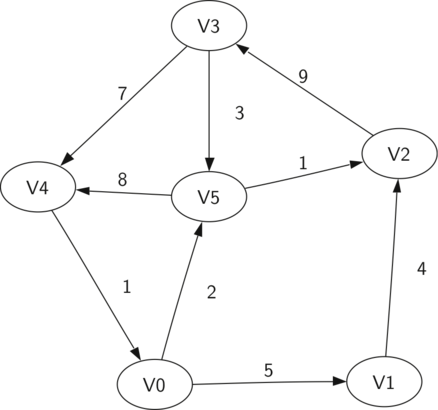

### Path
- Path란 찾아가는 경로
- 일반적으로 w1,w2,...,wn 로 표현 
- w는 Edge들의 원소임
- V3에서 V1으로 가는 Path를 표현하면 {(v3,v4,7),(v4,v0,1),(v0,v1,5)}

### Cycle
- 출발한 노드로 다시 돌아오는것
- (V5,V2,V3,V5) is a cycle.
- A graph with no cycles is called an acyclic graph.
- A directed graph with no cycles is called a directed acyclic graph or a DAG.


# 7.4. An Adjacency Matrix

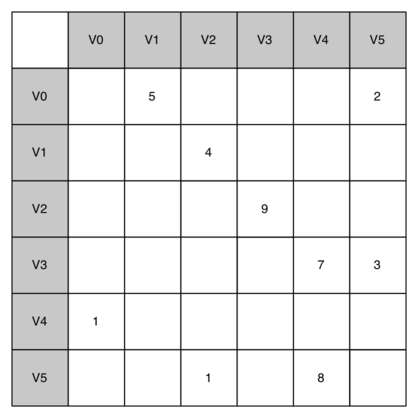

- 인접행렬로 표현
- 행이 시작점 열이 도착점
- 값은 weight
- 장점은 직관적으로 알아보기 쉬움
- Edge가 많을때 쓰면 좋은 방법
- 단점으로는 메모리 낭비가 심할 수 있음

# 7.5. An Adjacency List

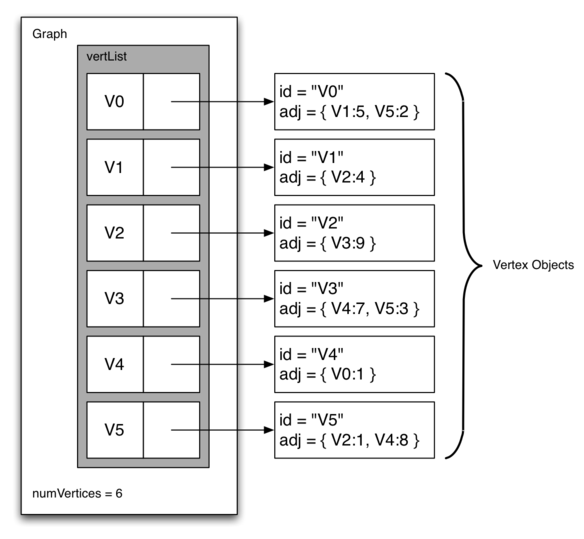

- 인접 리스트
- Vertex의 목록을 유지 하고 Vertex마다 Edge 값을 저장
- python에서는 dictionary의 키값을 Vertex 값을 저장하고 벨류를 Edge값으로 저장
- 장점은 특정 Vertex에 연결된 Edge를 찾기가 쉽다

### Edge가 많으면 인접행렬 추천 Edge가 적으면 인접리스트 추천

# 7.6. Implementation



In [2]:
class Vertex:
    def __init__(self,key):
        self.id = key
        self.connectedTo = {}

    def addNeighbor(self,nbr,weight=0):
        self.connectedTo[nbr] = weight

    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getWeight(self,nbr):
        return self.connectedTo[nbr]

In [3]:
class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0

    def addVertex(self,key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self,n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self,n):
        return n in self.vertList

    def addEdge(self,f,t,cost=0):
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], cost)

    def getVertices(self):
        return self.vertList.keys()

    def __iter__(self):
        return iter(self.vertList.values())

In [17]:
g = Graph()
for i in range(6):
    g.addVertex(i)
for i in g.vertList.items():
    print(i)



g.addEdge(0,1,5)
g.addEdge(0,5,2)
g.addEdge(1,2,4)
g.addEdge(2,3,9)
g.addEdge(3,4,7)
g.addEdge(3,5,3)
g.addEdge(4,0,1)
g.addEdge(5,4,8)
g.addEdge(5,2,1)

for v in g:
    for w in v.getConnections():
        print("( %s , %s )" % (v.getId(), w.getId()))
        


(0, <__main__.Vertex object at 0x000001F9EF236FD0>)
(1, <__main__.Vertex object at 0x000001F9EF2361D0>)
(2, <__main__.Vertex object at 0x000001F9EF236BE0>)
(3, <__main__.Vertex object at 0x000001F9EF236BA8>)
(4, <__main__.Vertex object at 0x000001F9EF236978>)
(5, <__main__.Vertex object at 0x000001F9EF236B70>)
( 0 , 1 )
( 0 , 5 )
( 1 , 2 )
( 2 , 3 )
( 3 , 4 )
( 3 , 5 )
( 4 , 0 )
( 5 , 4 )
( 5 , 2 )
